# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Data is difficult to understand like this. It is always best to visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


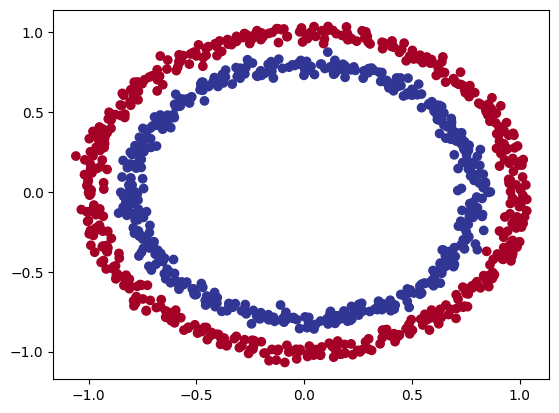

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

#1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

#4. Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

At 50% accuracy our binary classification model is basically guessing between two options.

So we must improve the model.

In [10]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

#4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932350993156433, 0.5]

Adding a layer did not improve at all...

In [11]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Methods for improving a model so far.  

1. Create a model - we might want to add more layers or increase the number of hidden units in a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam or SGD.
3. Fitting a model - we might fit our model for more epochs (train it for longer).

In [12]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

#4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939480304718018, 0.5]

Adding layers, hidden units, and changing the optimizer did not improve at all...

To visualize our model's predictions, we can make a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unqiue class falls)

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  This function was inspired by two resources:
   1. https://cs231n.github.io/
   2. https://github.com/GokuMohandas/Made-With-ML
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing multiclass classification


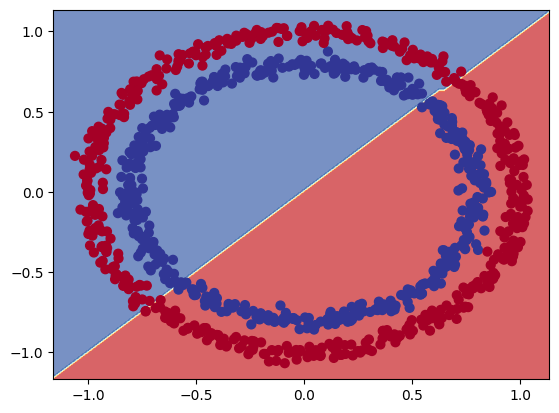

In [14]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

We can see our model tried to develop a straight line through the data, which would be useful for a regression problem. However, our data is circular and this is a classification problem..

In [15]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

This doesn't work... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [16]:
# Setup random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model, this time with regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)


2/2 [==============================] - 0s 3ms/step


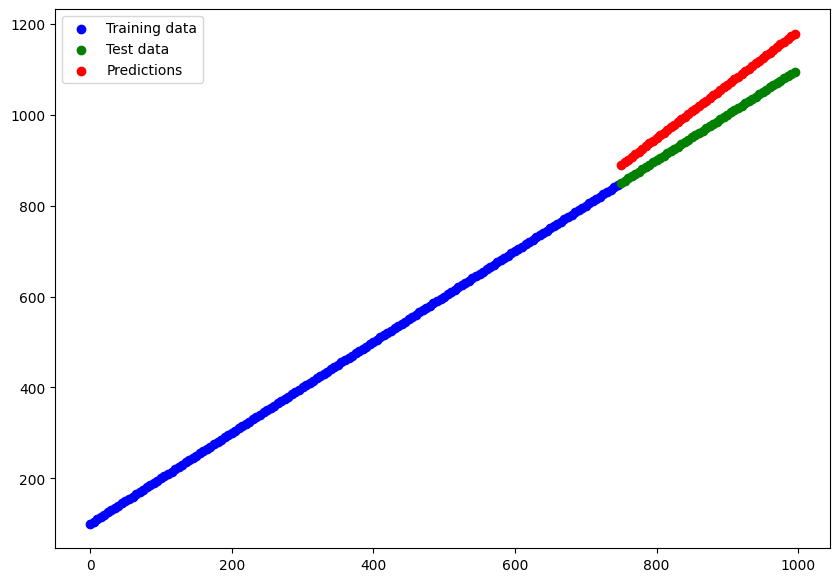

In [17]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [18]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)


In [19]:
# Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.9370


[0.4470093548297882, 0.9369999766349792]

313/313 [==============================] - 0s 1ms/step
doing binary classification


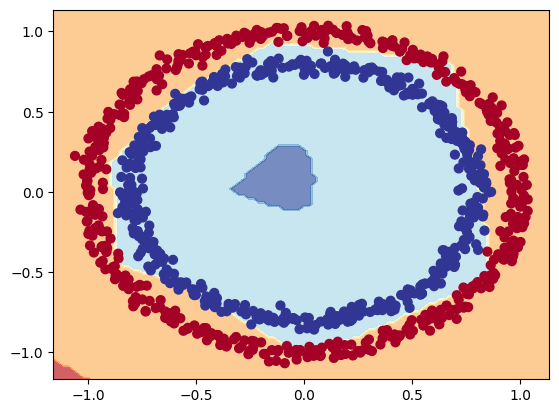

In [20]:
# How do our model predictions look?
plot_decision_boundary(model_4, X, y)

In [21]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

In [22]:
#4. Evaluate our model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7450


[0.5871014595031738, 0.7450000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification


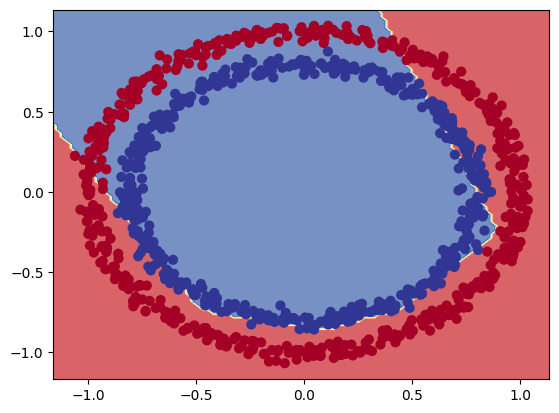

In [23]:
# How do our model predictions look?
plot_decision_boundary(model_5, X, y)

The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.

In [24]:
# Create a toy tensor (similar to the data we pass into our mdoels)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

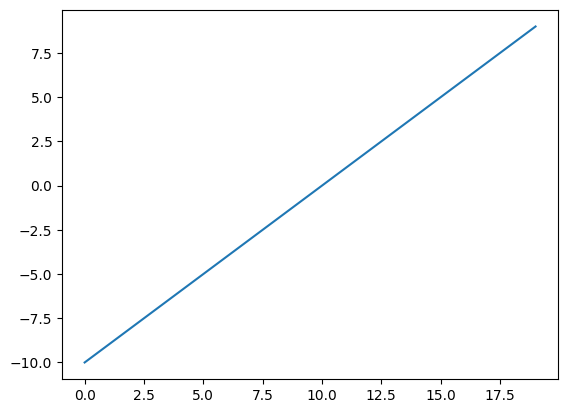

In [25]:
# Visualize our toy tensor
plt.plot(A)

In [26]:
# Replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

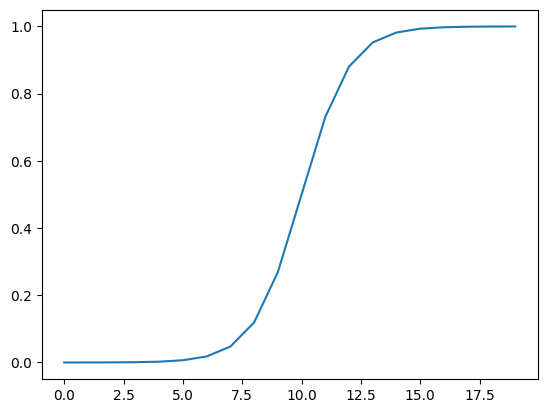

In [27]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [28]:
# Recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

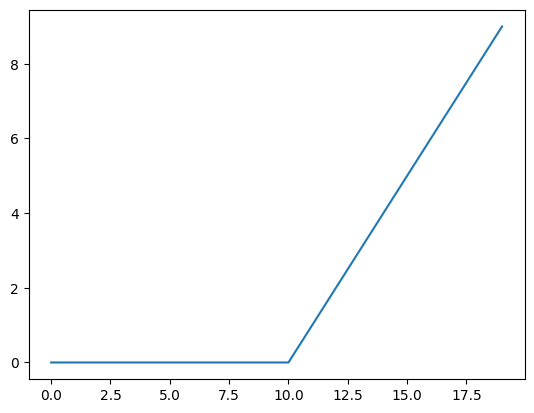

In [29]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [30]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

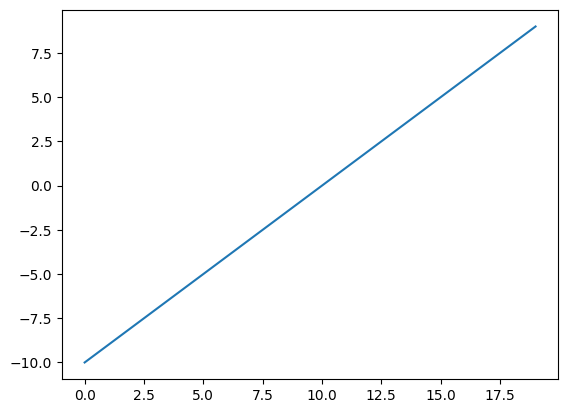

In [31]:
# Plot linear tensor (unchanged)
plt.plot(tf.keras.activations.linear(A))

In [32]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

So let's create a training and test set.

In [33]:
# Check how many examples we have
len(X)

1000

In [34]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [35]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

#1. Create the model (same as model_5 but raise learning rate and lower epochs)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_6.fit(X_train, y_train, epochs=25, verbose=0)

#4. Evaluate the model
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8350


[0.42493876814842224, 0.8349999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


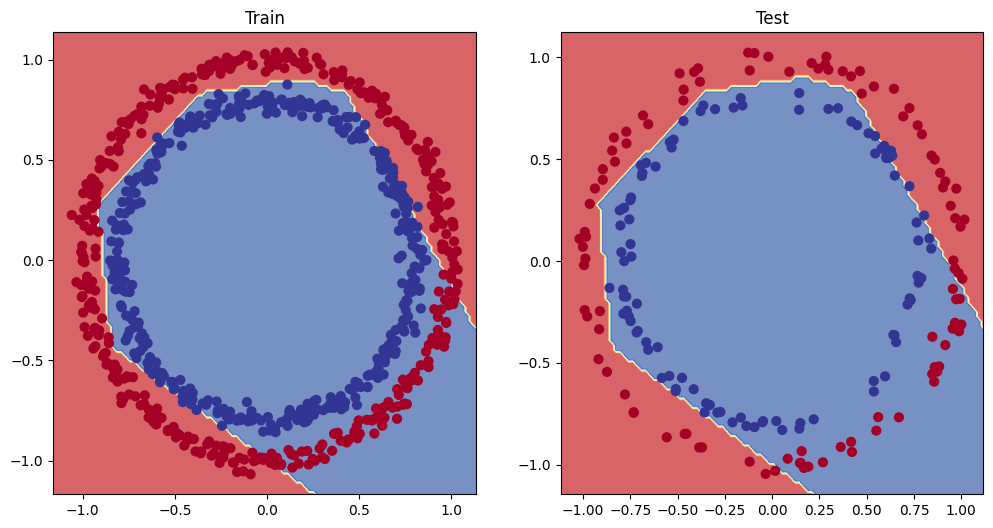

In [36]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [37]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689245,0.53375
1,0.687190,0.52875
2,0.685122,0.53375
3,0.683384,0.53500
4,0.681382,0.53375
5,0.678312,0.53750
6,0.669939,0.55625
7,0.658183,0.58625
8,0.639989,0.67625
9,0.614142,0.68250


Text(0.5, 1.0, 'Model_6 loss curves')

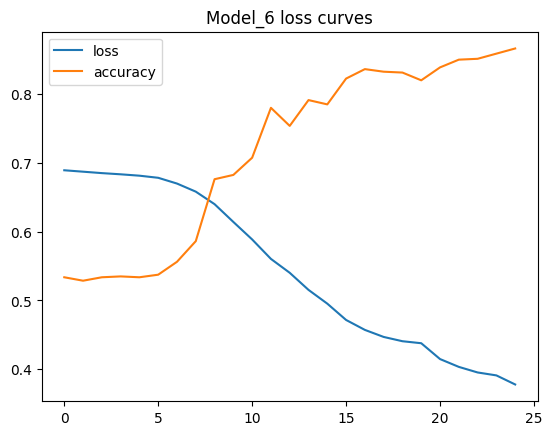

In [38]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")

> For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - a callback is essentially an extra piece of functionality you can add to your model *while* its training.
* Another model
* A modified loss curves plot.

In [39]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model (same as model_5 but with lr_scheduler)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#3. Fit the model (passing lr_scheduler callback)
history_7 = model_7.fit(X_train,
                      y_train,
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_scheduler])

#4. Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6933442950248718, 0.4950000047683716]

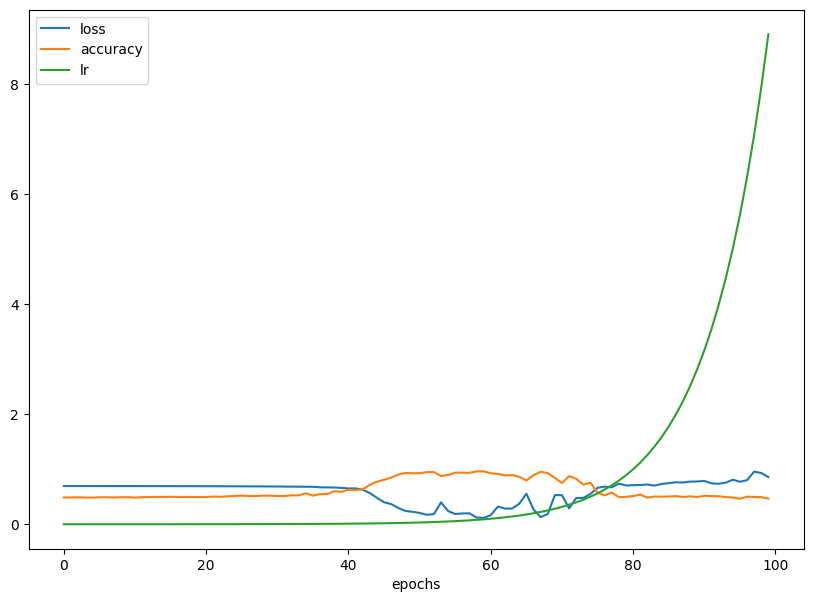

In [40]:
# Checkout the history
pd.DataFrame(history_7.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

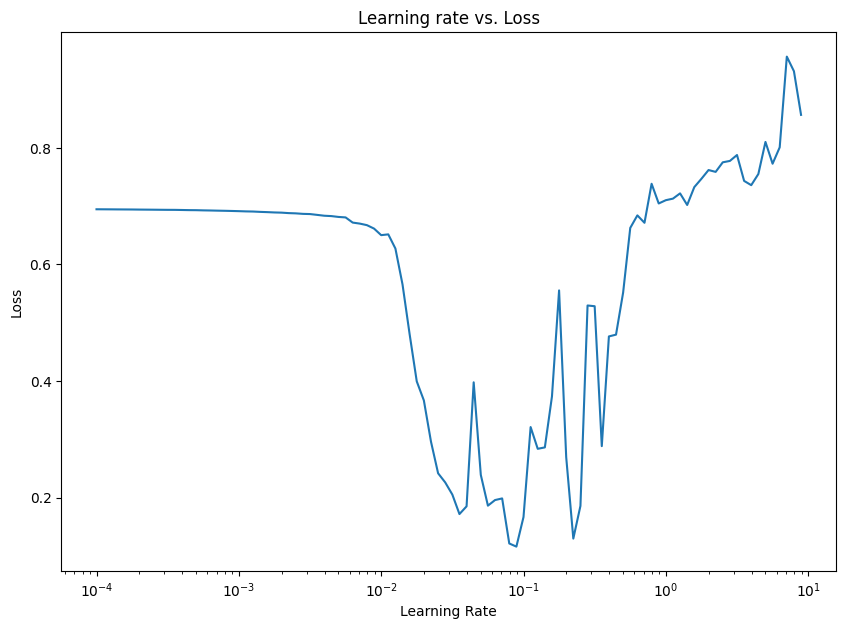

In [41]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [42]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [43]:
# Using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model (with ideal learning rate)
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

#3. Fit the model for 20 epochs (5 less than best model)
history_8 = model_8.fit(X_train, y_train, epochs=20, verbose=0)

#4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9900


[0.04794914647936821, 0.9900000095367432]

In [44]:
# Evaluate model 6 on the test dataset
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8350


[0.42493876814842224, 0.8349999785423279]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


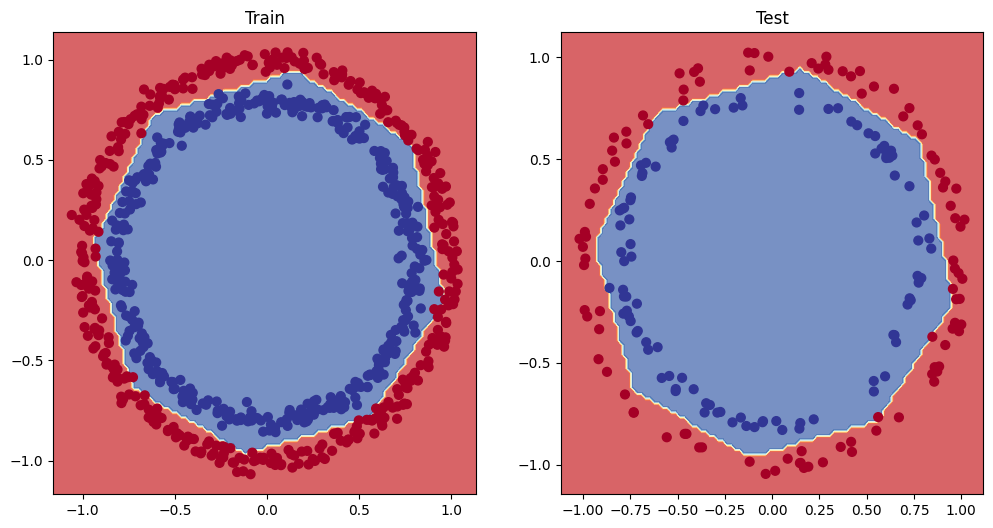

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [46]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9900
Model loss on the test set: 0.04794914647936821
Model accuracy on the test set: 99.00%


> Our prediction array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [47]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_8.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds)) # Convert prediction probabilities to binary format and view the first 10

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 0, 99]])

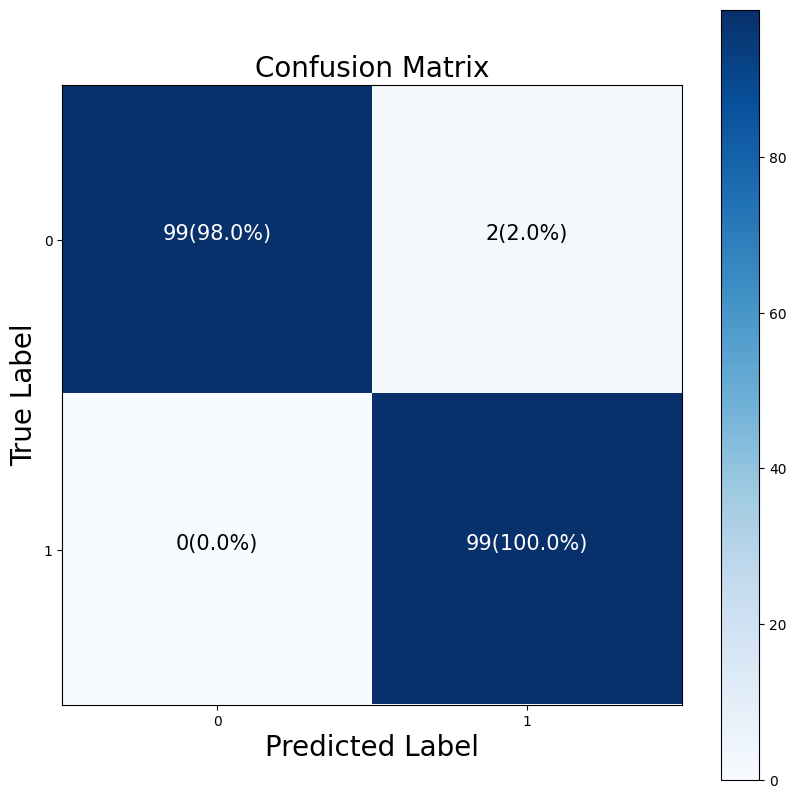

In [48]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]}({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

# Working with a larger example (multi-class classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [50]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [51]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

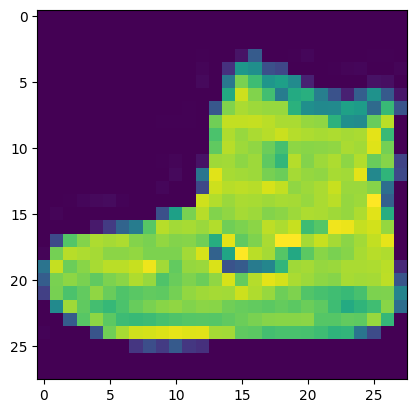

In [52]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [53]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

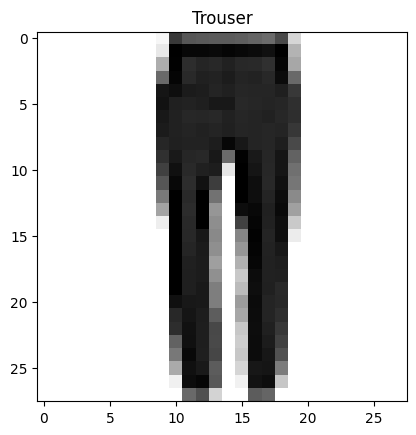

In [54]:
# Plot an example image and its label
index = 2023
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

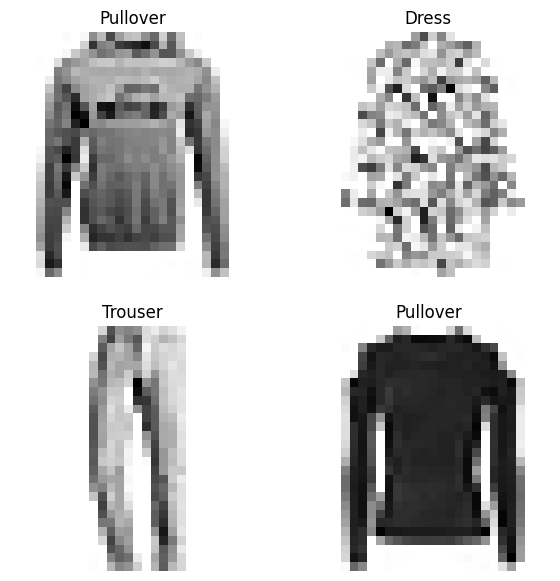

In [55]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architechture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [56]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data needs to be flattened (from 28, 28 to None, 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#2. Compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
non_norm_history = model_9.fit(tf.expand_dims(train_data, axis=-1),
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3164 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3133 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3035 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [57]:
# Check the model summary
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

> Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [59]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [60]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#3. Fit the model
norm_history = model_10.fit(tf.expand_dims(train_data_norm, axis=-1),
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1145 - accuracy: 0.6015 - val_loss: 0.7891 - val_accuracy: 0.7230
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7241 - accuracy: 0.7431 - val_loss: 0.7317 - val_accuracy: 0.7410
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6738 - accuracy: 0.7607 - val_loss: 0.6894 - val_accuracy: 0.7507
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6492 - accuracy: 0.7695 - val_loss: 0.6631 - val_accuracy: 0.7683
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6348 - accuracy: 0.7750 - val_loss: 0.6610 - val_accuracy: 0.7656
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6222 - accuracy: 0.7791 - val_loss: 0.6680 - val_accuracy: 0.7706
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6153 - accuracy: 0.7817 - val_loss: 0.6671 - val_accuracy:

> Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

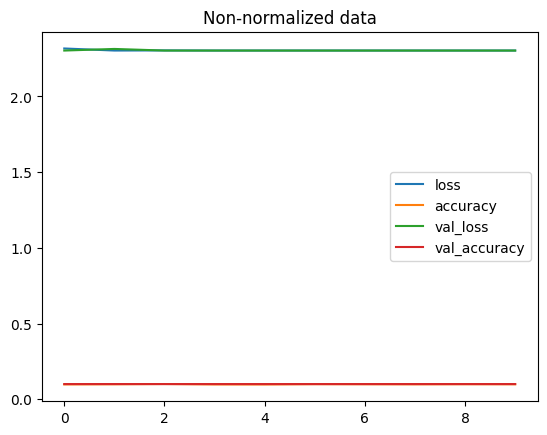

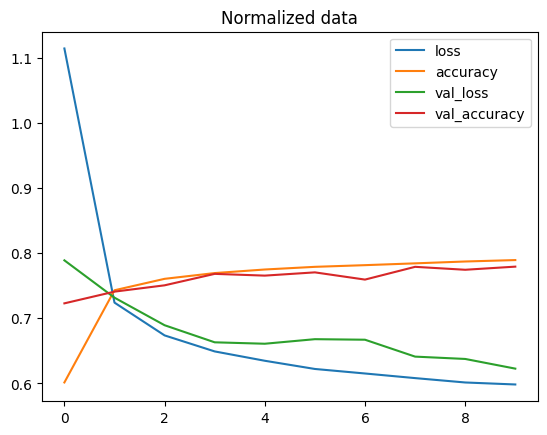

In [61]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> The same model with *slightly* different data can produce dramatically different results. So when comparing models, it is important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architechture).

## Finding the ideal learning rate

In [62]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#3. Fit the model
find_lr_history = model_11.fit(tf.expand_dims(train_data_norm, axis=-1),
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.3701 - accuracy: 0.4899 - val_loss: 0.9914 - val_accuracy: 0.6307 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8674 - accuracy: 0.6805 - val_loss: 0.8067 - val_accuracy: 0.6730 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7409 - accuracy: 0.7222 - val_loss: 0.7268 - val_accuracy: 0.7313 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6834 - accuracy: 0.7485 - val_loss: 0.6748 - val_accuracy: 0.7541 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6499 - accuracy: 0.7579 - val_loss: 0.6748 - val_accuracy: 0.7530 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6240 - accuracy: 0.7692 - val_loss: 0.6415 - val_accuracy: 0.7687 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

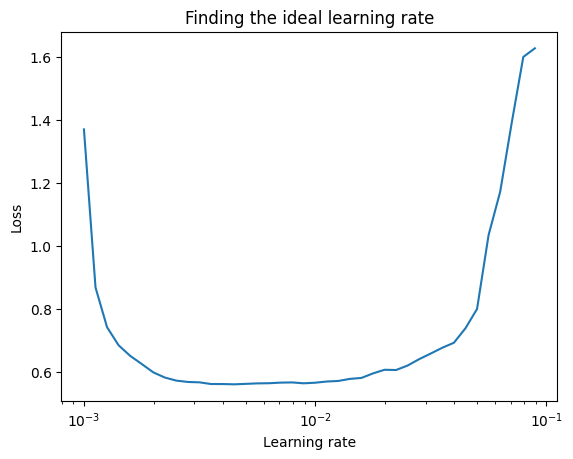

In [63]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [64]:
# Let's refit model with the ideal learning rate

# Set random seed

#1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

#3. Fit the model
model_12.fit(tf.expand_dims(train_data_norm, axis=-1),
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.6665 - accuracy: 0.3474 - val_loss: 1.2835 - val_accuracy: 0.4518
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1832 - accuracy: 0.4920 - val_loss: 1.1315 - val_accuracy: 0.5293
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0604 - accuracy: 0.5471 - val_loss: 1.0462 - val_accuracy: 0.5695
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9744 - accuracy: 0.6190 - val_loss: 0.9672 - val_accuracy: 0.6362
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9136 - accuracy: 0.6493 - val_loss: 0.9103 - val_accuracy: 0.6515
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8747 - accuracy: 0.6629 - val_loss: 0.8962 - val_accuracy: 0.6570
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8533 - accuracy: 0.6744 - val_loss: 0.8830 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we coudl:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architechture)
* Save and export it for use in an application



In [65]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  """
  Creates a confusion matrix from inputs of test data and prediction data.
  """

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [66]:
# Make some predictions with our model
y_probs = model_12.predict(test_data_norm) # probds is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.7166256e-05, 9.6150303e-05, 3.9535415e-05, 3.1665075e-04,
        6.8995979e-04, 3.1704527e-01, 2.9519541e-04, 7.1005121e-02,
        1.4031876e-02, 5.9645313e-01],
       [1.0098026e-03, 1.8072925e-22, 8.3216453e-01, 1.3789297e-09,
        8.0421083e-02, 6.8864811e-22, 8.6404383e-02, 0.0000000e+00,
        2.2819489e-07, 0.0000000e+00],
       [9.1024413e-06, 9.9281138e-01, 2.7460840e-09, 7.1782274e-03,
        1.9197678e-10, 6.5876827e-07, 6.0667368e-08, 5.9594436e-07,
        1.1326537e-13, 2.0873164e-18],
       [2.7789897e-06, 9.9578190e-01, 1.0238539e-09, 3.2719485e-03,
        1.1730478e-10, 2.7932558e-06, 2.5241842e-08, 9.4070227e-04,
        2.2238944e-13, 7.6756113e-14],
       [1.7753659e-01, 3.2829957e-06, 1.9822447e-01, 3.0252000e-02,
        1.2219734e-01, 1.8509996e-06, 4.7119790e-01, 1.2978523e-29,
        5.8653601e-04, 1.9049307e-38]], dtype=float32)

> Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [67]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 5 prediction labels
y_preds[:5]

array([9, 2, 1, 1, 6])

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[684,   1,  20, 124,  17,   6, 136,   0,  11,   1],
       [  2, 907,   0,  69,   3,   1,  14,   2,   2,   0],
       [ 22,   1, 449,  13, 226,   1, 282,   0,   6,   0],
       [ 50,   9,   3, 794,  10,   4, 126,   0,   4,   0],
       [  2,   0,  42,  27, 726,   2, 174,   0,  27,   0],
       [  0,   0,   0,   2,   1, 879,   0,  37,  36,  45],
       [120,   0,  98,  74, 296,   3, 387,   0,  21,   1],
       [  0,   0,   0,   0,   0,  68,   0, 860,   0,  72],
       [  0,   0,   4,   6,  44,  25,  10,   4, 903,   4],
       [  0,   0,   0,   0,   0,  31,   0,  33,   4, 932]])

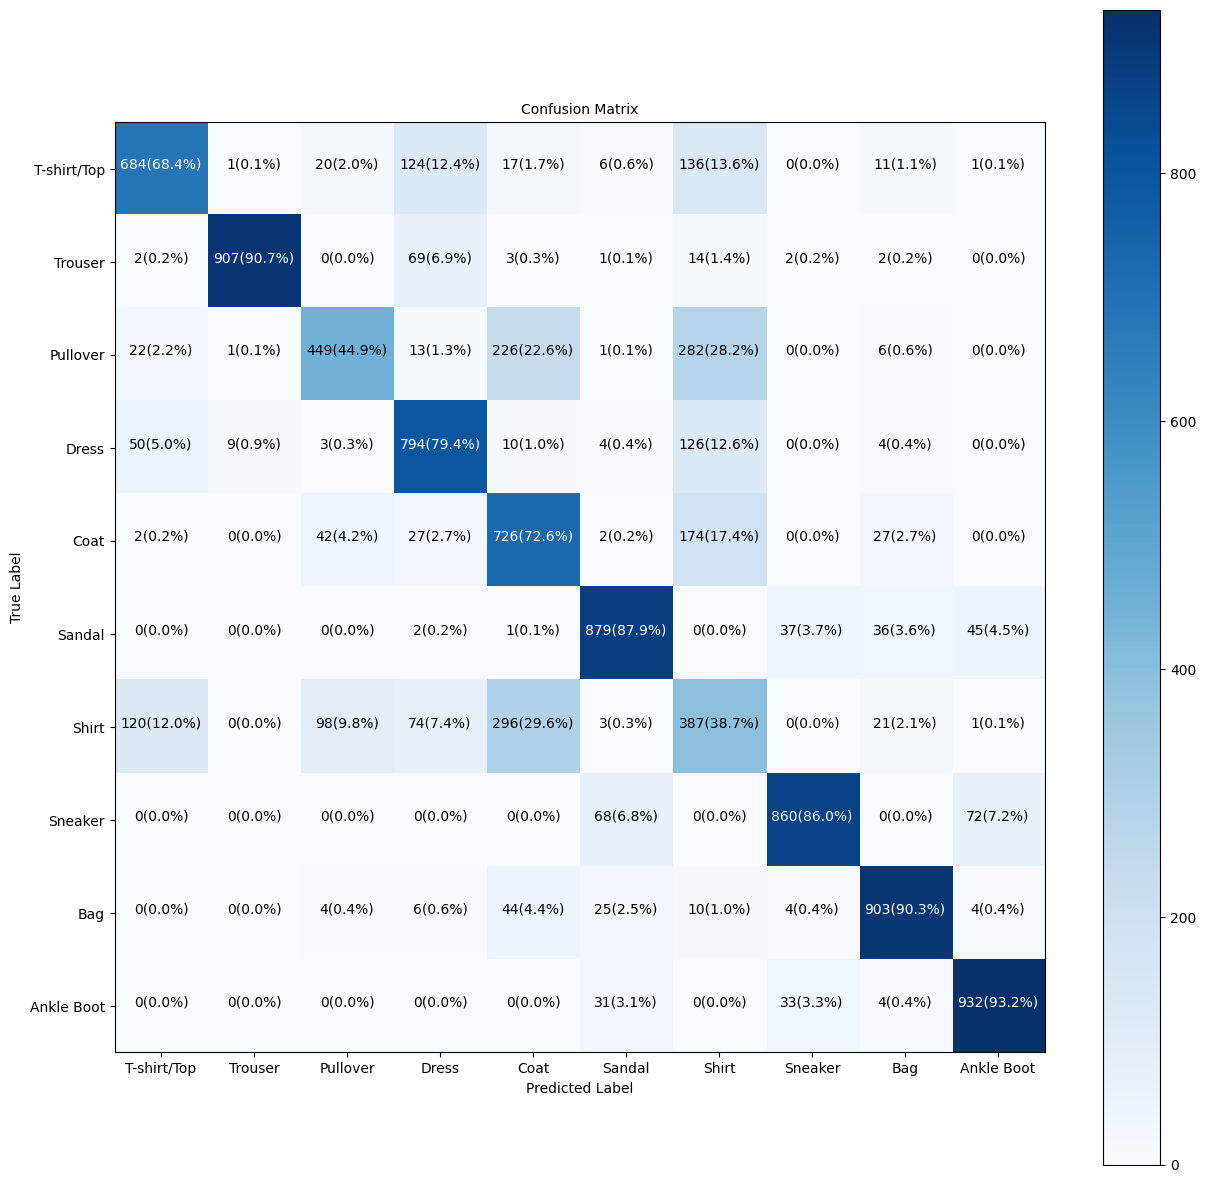

In [69]:
# Make prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> Often when working with images and other forms of visual data, it's good to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

We can create a function to:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [70]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color to green or red based on if prediction is right or wrong


1/1 [==============================] - 0s 18ms/step


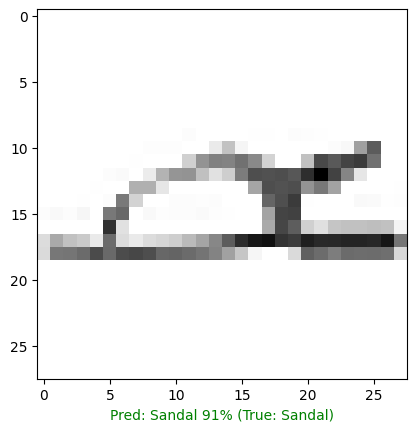

In [71]:
# Check out a random image as well as its prediction
plot_random_image(model=model_12,
                  images=test_data_norm, # always make predictions on same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [72]:
# Find the layers of our most recent model
model_12.layers

In [73]:
# Extract a particular layer
model_12.layers[0]

In [74]:
# Get the patterns of a layer in our network
weights, biases = model_12.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.47899282,  0.40974158,  0.33456558, -0.6307735 ],
        [ 0.86200565,  0.05773784, -0.50110954, -0.2998696 ],
        [ 0.71001554, -0.87290037,  0.4127172 , -0.8192649 ],
        ...,
        [ 0.5052045 , -0.01816846,  0.01604826, -0.28502938],
        [ 0.40125138,  0.27623633, -0.22876652, -0.11141118],
        [ 0.18686202,  0.14191432,  0.15674803, -0.4212533 ]],
       dtype=float32),
 (784, 4))

In [75]:
28 * 28

784

In [76]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 3140      
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.46872765, -3.4010777 ,  1.6925032 , -1.628569  ], dtype=float32),
 (4,))

> Every neuron has a bias vector. Each of these is paired with a weights matrix.

> The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

> The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [78]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 3140      
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


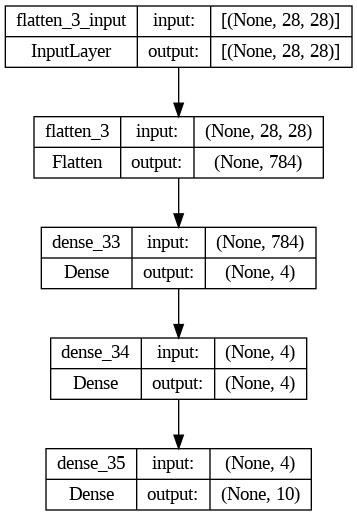

In [79]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)